In [6]:
import os
import random
import pandas as pd
import numpy as np
from shutil import copyfile
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2


In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
ROOT_DIR = os.path.abspath("/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/")
input_path =  "/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/"

In [9]:

data_dir='/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/'
print(len(os.listdir(data_dir+'soybean/')))
print(len(os.listdir(data_dir+'soil/')))
print(len(os.listdir(data_dir+'grass/')))
print(len(os.listdir(data_dir+'broadleaf/')))

7376
3249
3520
1191


In [10]:
print(os.listdir(data_dir))

['broadleaf', 'grass', 'soybean', 'soil']


In [11]:
classes=os.listdir(data_dir)

In [12]:
classes

['broadleaf', 'grass', 'soybean', 'soil']

In [13]:
source_path=[f'/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/{a}' for a in classes]
print(source_path)

['/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/broadleaf', '/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/grass', '/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/soybean', '/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/soil']


In [14]:
classes_dir=[f'{a}_dir' for a in classes]
classes_dir

['broadleaf_dir', 'grass_dir', 'soybean_dir', 'soil_dir']

In [15]:
for cl_dir,cl_path in zip(classes_dir,source_path):
    print(cl_dir,': ',len(os.listdir(cl_path)))

broadleaf_dir :  1191
grass_dir :  3520
soybean_dir :  7376
soil_dir :  3249


In [16]:
!pwd

/content


In [17]:
try:
    os.mkdir('/content/training')
    os.mkdir('/content/testing')
except OSError:
    pass

In [18]:
TRAINING_PATH='/content/training'
training_dir_path=[f'/content/training/{a}' for a in classes]
print('\n',training_dir_path)
testing_dir_path=[f'/content/testing/{a}' for a in classes]
print('\n',testing_dir_path)


 ['/content/training/broadleaf', '/content/training/grass', '/content/training/soybean', '/content/training/soil']

 ['/content/testing/broadleaf', '/content/testing/grass', '/content/testing/soybean', '/content/testing/soil']


In [19]:
for train_dir_path in training_dir_path:
    try:
        os.mkdir(train_dir_path)
    except OSError:
        pass

In [20]:
for test_dir_path in testing_dir_path:
    try:
        os.mkdir(test_dir_path)
    except OSError:
        pass

In [21]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    print('Split Data')
    for filename in os.listdir(SOURCE):
        file = SOURCE +'/'+ filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int( len(files)* SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    
    print('SOURCE: ',SOURCE, '\n TRAINING', TRAINING,  '\n ',len(files))
    print('training_length:',training_length)
    print('testing_length:',testing_length)
    
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set=shuffled_set[:testing_length]

    print(len(training_set))
    print(len(testing_set))
    
    for filename in training_set:
        this_file = SOURCE +'/'+ filename
        destination = TRAINING +'/'+ filename
        copyfile(this_file, destination)
    
        
    for filename in testing_set:
        this_file = SOURCE +'/'+ filename
        destination = TESTING+'/' + filename
        copyfile(this_file, destination)

In [22]:
split_size = .85
for source,train_dir_path,test_dir_path in zip(source_path,\
                                training_dir_path, testing_dir_path):
    #print('source: ',source,'\n', train_dir_path,'\n')
    split_data(source,train_dir_path, test_dir_path, split_size)
    print('Splitting \n')

Split Data
SOURCE:  /content/gdrive/MyDrive/Weed_Detection_dataset/dataset/broadleaf 
 TRAINING /content/training/broadleaf 
  1191
training_length: 1012
testing_length: 179
1012
179
Splitting 

Split Data
SOURCE:  /content/gdrive/MyDrive/Weed_Detection_dataset/dataset/grass 
 TRAINING /content/training/grass 
  3520
training_length: 2992
testing_length: 528
2992
528
Splitting 

Split Data
SOURCE:  /content/gdrive/MyDrive/Weed_Detection_dataset/dataset/soybean 
 TRAINING /content/training/soybean 
  7376
training_length: 6269
testing_length: 1107
6269
1107
Splitting 

Split Data
SOURCE:  /content/gdrive/MyDrive/Weed_Detection_dataset/dataset/soil 
 TRAINING /content/training/soil 
  3249
training_length: 2761
testing_length: 488
2761
488
Splitting 



In [23]:
from sklearn.model_selection import train_test_split

In [24]:
print(len(os.listdir('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/soybean')))

7376


In [25]:
try:
    os.mkdir('/content/gdrive/My Drive/Colab Notebooks/content')
    os.mkdir('/content/gdrive/My Drive/Colab Notebooks/content/training')
    os.mkdir('/content/gdrive/My Drive/Colab Notebooks/content/testing')
    
    os.mkdir('/content/gdrive/My Drive/Colab Notebooks/content/training/soybean')
    os.mkdir('/content/gdrive/My Drive/Colab Notebooks/content/training/grass')
    os.mkdir('/content/gdrive/My Drive/Colab Notebooks/content/training/broadleaf')
    os.mkdir('/content/gdrive/My Drive/Colab Notebooks/content/training/soil')
    
    os.mkdir('/content/gdrive/My Drive/Colab Notebooks/content/testing/soybean')
    os.mkdir('/content/gdrive/My Drive/Colab Notebooks/content/testing/grass')
    os.mkdir('/content/gdrive/My Drive/Colab Notebooks/content/testing/broadleaf')
    os.mkdir('/content/gdrive/My Drive/Colab Notebooks/content/testing/soil')

except OSError:
    pass

In [26]:
allFileNames = os.listdir('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/soybean')

In [27]:
allFileNames_g = os.listdir('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/grass')
allFileNames_s = os.listdir('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/soil')
allFileNames_b = os.listdir('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/broadleaf')

In [28]:
allFileNames

['6738.tif',
 '6739.tif',
 '674.tif',
 '6740.tif',
 '6741.tif',
 '6742.tif',
 '6743.tif',
 '6744.tif',
 '6745.tif',
 '6746.tif',
 '6747.tif',
 '6748.tif',
 '6749.tif',
 '675.tif',
 '6750.tif',
 '6751.tif',
 '6752.tif',
 '6753.tif',
 '6754.tif',
 '6755.tif',
 '6756.tif',
 '6757.tif',
 '6758.tif',
 '6759.tif',
 '676.tif',
 '6760.tif',
 '6761.tif',
 '6762.tif',
 '6763.tif',
 '6764.tif',
 '6765.tif',
 '6766.tif',
 '6767.tif',
 '6768.tif',
 '6769.tif',
 '677.tif',
 '6770.tif',
 '6771.tif',
 '6772.tif',
 '6773.tif',
 '6774.tif',
 '6775.tif',
 '6776.tif',
 '6777.tif',
 '6778.tif',
 '6779.tif',
 '678.tif',
 '6780.tif',
 '6781.tif',
 '6782.tif',
 '6783.tif',
 '6784.tif',
 '6785.tif',
 '6786.tif',
 '6787.tif',
 '6788.tif',
 '6789.tif',
 '679.tif',
 '6790.tif',
 '6791.tif',
 '6792.tif',
 '6793.tif',
 '6794.tif',
 '6795.tif',
 '6796.tif',
 '6797.tif',
 '6798.tif',
 '6799.tif',
 '68.tif',
 '680.tif',
 '6800.tif',
 '6801.tif',
 '6802.tif',
 '6803.tif',
 '6804.tif',
 '6805.tif',
 '6806.tif',
 '6807.t

In [29]:
allFileNames_g

['3267.tif',
 '3268.tif',
 '3269.tif',
 '327.tif',
 '3270.tif',
 '3271.tif',
 '3272.tif',
 '3273.tif',
 '3274.tif',
 '3275.tif',
 '3276.tif',
 '3277.tif',
 '3278.tif',
 '3279.tif',
 '328.tif',
 '3280.tif',
 '3281.tif',
 '3282.tif',
 '3283.tif',
 '3284.tif',
 '3285.tif',
 '3286.tif',
 '3287.tif',
 '3288.tif',
 '3289.tif',
 '329.tif',
 '3290.tif',
 '3291.tif',
 '3292.tif',
 '3293.tif',
 '3294.tif',
 '3295.tif',
 '3296.tif',
 '3297.tif',
 '3298.tif',
 '3299.tif',
 '33.tif',
 '330.tif',
 '3300.tif',
 '3301.tif',
 '3302.tif',
 '3303.tif',
 '3304.tif',
 '3305.tif',
 '3306.tif',
 '3307.tif',
 '3308.tif',
 '3309.tif',
 '331.tif',
 '3310.tif',
 '3311.tif',
 '3312.tif',
 '3313.tif',
 '3314.tif',
 '3315.tif',
 '3316.tif',
 '3317.tif',
 '3318.tif',
 '3319.tif',
 '332.tif',
 '3320.tif',
 '3321.tif',
 '3322.tif',
 '3323.tif',
 '3324.tif',
 '3325.tif',
 '3326.tif',
 '3327.tif',
 '3328.tif',
 '3329.tif',
 '333.tif',
 '3330.tif',
 '3331.tif',
 '3332.tif',
 '3333.tif',
 '3334.tif',
 '3335.tif',
 '3336.t

In [30]:
allFileNames_s

['3022.tif',
 '3023.tif',
 '3024.tif',
 '3025.tif',
 '3026.tif',
 '3027.tif',
 '3028.tif',
 '3029.tif',
 '303.tif',
 '3030.tif',
 '3031.tif',
 '3032.tif',
 '3033.tif',
 '3034.tif',
 '3035.tif',
 '3036.tif',
 '3037.tif',
 '3038.tif',
 '3039.tif',
 '304.tif',
 '3040.tif',
 '3041.tif',
 '3042.tif',
 '3043.tif',
 '3044.tif',
 '3045.tif',
 '3046.tif',
 '3047.tif',
 '3048.tif',
 '3049.tif',
 '305.tif',
 '3050.tif',
 '3051.tif',
 '3052.tif',
 '3053.tif',
 '3054.tif',
 '3055.tif',
 '3056.tif',
 '3057.tif',
 '3058.tif',
 '3059.tif',
 '306.tif',
 '3060.tif',
 '3061.tif',
 '3062.tif',
 '3063.tif',
 '3064.tif',
 '3065.tif',
 '3066.tif',
 '3067.tif',
 '3068.tif',
 '3069.tif',
 '307.tif',
 '3070.tif',
 '3071.tif',
 '3072.tif',
 '3073.tif',
 '3074.tif',
 '3075.tif',
 '3076.tif',
 '3077.tif',
 '3078.tif',
 '3079.tif',
 '308.tif',
 '3080.tif',
 '3081.tif',
 '3082.tif',
 '3083.tif',
 '3084.tif',
 '3085.tif',
 '3086.tif',
 '3087.tif',
 '3088.tif',
 '3089.tif',
 '309.tif',
 '3090.tif',
 '3091.tif',
 '3092

In [31]:
allFileNames_b

['1170.tif',
 '1171.tif',
 '1172.tif',
 '1173.tif',
 '1174.tif',
 '1175.tif',
 '1176.tif',
 '1177.tif',
 '1178.tif',
 '1179.tif',
 '118.tif',
 '1180.tif',
 '1181.tif',
 '1182.tif',
 '1183.tif',
 '1184.tif',
 '1185.tif',
 '1186.tif',
 '1187.tif',
 '1188.tif',
 '1189.tif',
 '119.tif',
 '1190.tif',
 '1191.tif',
 '12.tif',
 '120.tif',
 '121.tif',
 '122.tif',
 '123.tif',
 '124.tif',
 '125.tif',
 '126.tif',
 '127.tif',
 '128.tif',
 '129.tif',
 '13.tif',
 '130.tif',
 '131.tif',
 '132.tif',
 '133.tif',
 '134.tif',
 '135.tif',
 '136.tif',
 '137.tif',
 '138.tif',
 '139.tif',
 '14.tif',
 '140.tif',
 '141.tif',
 '142.tif',
 '143.tif',
 '144.tif',
 '145.tif',
 '146.tif',
 '147.tif',
 '148.tif',
 '149.tif',
 '15.tif',
 '150.tif',
 '151.tif',
 '152.tif',
 '153.tif',
 '154.tif',
 '155.tif',
 '156.tif',
 '157.tif',
 '158.tif',
 '159.tif',
 '16.tif',
 '160.tif',
 '161.tif',
 '162.tif',
 '163.tif',
 '164.tif',
 '165.tif',
 '166.tif',
 '167.tif',
 '168.tif',
 '169.tif',
 '17.tif',
 '170.tif',
 '171.tif',


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test= train_test_split(allFileNames,  test_size=0.20)

In [34]:
X_train_g, X_test_g= train_test_split(allFileNames_g,  test_size=0.20)

In [35]:
X_train_b, X_test_b= train_test_split(allFileNames_b,  test_size=0.20)

In [36]:
X_train_s, X_test_s= train_test_split(allFileNames_s,  test_size=0.20)

In [37]:
len(X_train)

5900

In [38]:
#len(X_train_g)
len(X_train_s)
#len(X_train_b)

2599

In [39]:
len(X_test)

1476

In [40]:
#len(X_test_g)
len(X_test_s)
#len(X_test_b)

650

In [41]:
X_test

['872.tif',
 '5737.tif',
 '6874.tif',
 '6093.tif',
 '998.tif',
 '6717.tif',
 '1376.tif',
 '3422.tif',
 '3386.tif',
 '4914.tif',
 '44.tif',
 '1981.tif',
 '1660.tif',
 '3356.tif',
 '3095.tif',
 '4320.tif',
 '4615.tif',
 '6082.tif',
 '1074.tif',
 '4315.tif',
 '234.tif',
 '3975.tif',
 '5318.tif',
 '4140.tif',
 '2369.tif',
 '1131.tif',
 '4649.tif',
 '2265.tif',
 '322.tif',
 '1171.tif',
 '1889.tif',
 '4846.tif',
 '2762.tif',
 '183.tif',
 '552.tif',
 '4103.tif',
 '4254.tif',
 '3105.tif',
 '7203.tif',
 '1050.tif',
 '3232.tif',
 '1312.tif',
 '3445.tif',
 '1995.tif',
 '2802.tif',
 '773.tif',
 '365.tif',
 '3449.tif',
 '6977.tif',
 '2786.tif',
 '5653.tif',
 '3425.tif',
 '6612.tif',
 '5569.tif',
 '6397.tif',
 '1057.tif',
 '910.tif',
 '3488.tif',
 '3344.tif',
 '2792.tif',
 '6770.tif',
 '2592.tif',
 '6252.tif',
 '1771.tif',
 '5192.tif',
 '5967.tif',
 '7086.tif',
 '4750.tif',
 '1239.tif',
 '3335.tif',
 '6910.tif',
 '4482.tif',
 '4413.tif',
 '4321.tif',
 '4981.tif',
 '1469.tif',
 '105.tif',
 '1608.tif'

In [42]:
import shutil

for name in X_train:
  shutil.copy('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/soybean/'+name, '/content/gdrive/My Drive/Colab Notebooks/content/training/soybean')

for name in X_test:
  shutil.copy('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/soybean/'+name, '/content/gdrive/My Drive/Colab Notebooks/content/testing/soybean')

In [43]:

for name in X_train_g:
  shutil.copy('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/grass/'+name, '/content/gdrive/My Drive/Colab Notebooks/content/training/grass')

for name in X_test_g:
  shutil.copy('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/grass/'+name, '/content/gdrive/My Drive/Colab Notebooks/content/testing/grass')

In [44]:
for name in X_train_s:
  shutil.copy('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/soil/'+name, '/content/gdrive/My Drive/Colab Notebooks/content/training/soil')

for name in X_test_s:
  shutil.copy('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/soil/'+name, '/content/gdrive/My Drive/Colab Notebooks/content/testing/soil')

In [45]:
for name in X_train_b:
  shutil.copy('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/broadleaf/'+name, '/content/gdrive/My Drive/Colab Notebooks/content/training/broadleaf')

for name in X_test_b:
  shutil.copy('/content/gdrive/MyDrive/Weed_Detection_dataset/dataset/broadleaf/'+name, '/content/gdrive/My Drive/Colab Notebooks/content/testing/broadleaf')

In [46]:
print(len(os.listdir('/content/gdrive/My Drive/Colab Notebooks/content/training/grass')))

3520


In [47]:
print(len(os.listdir('/content/gdrive/My Drive/Colab Notebooks/content/testing/grass')))

3041


In [48]:
print(len(os.listdir('/content/gdrive/My Drive/Colab Notebooks/content/training/soil')))

3249


In [49]:
print(len(os.listdir('/content/gdrive/My Drive/Colab Notebooks/content/testing/soil')))

2802


In [50]:
print(len(os.listdir('/content/gdrive/My Drive/Colab Notebooks/content/training/broadleaf')))

1191


In [51]:
print(len(os.listdir('/content/gdrive/My Drive/Colab Notebooks/content/testing/broadleaf')))

1042


In [52]:
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input

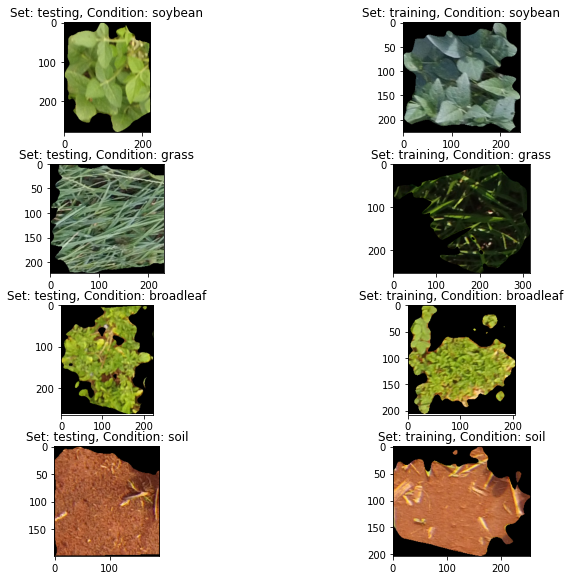

In [53]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/content/")
input_path = "/content/gdrive/My Drive/Colab Notebooks/content/"
fig, ax = plt.subplots(4, 2, figsize=(10, 8))
ax = ax.ravel()
plt.tight_layout()
for i, _set in enumerate(['testing', 'training']):
  set_path = input_path + _set
  ax[i].imshow(plt.imread(set_path+'/soybean/'+os.listdir(set_path+'/soybean')[0]), cmap='gray')
  ax[i].set_title('Set: {}, Condition: soybean'.format(_set))
  ax[i+2].imshow(plt.imread(set_path+'/grass/'+os.listdir(set_path+'/grass')[0]), cmap='gray')
  ax[i+2].set_title('Set: {}, Condition: grass'.format(_set))
  ax[i+4].imshow(plt.imread(set_path+'/broadleaf/'+os.listdir(set_path+'/broadleaf')[0]), cmap='gray')
  ax[i+4].set_title('Set: {}, Condition: broadleaf'.format(_set))
  ax[i+6].imshow(plt.imread(set_path+'/soil/'+os.listdir(set_path+'/soil')[0]), cmap='gray')
  ax[i+6].set_title('Set: {}, Condition: soil'.format(_set))

In [54]:
IMAGE_SIZE =[224,224]

In [55]:
train_path = "/content/gdrive/My Drive/Colab Notebooks/content/training"
valid_path = "/content/gdrive/My Drive/Colab Notebooks/content/testing"

In [56]:

model = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False
x = model(model.input, training=False)
x = Flatten()(x)
outputs = Dense(4, activation='sigmoid', name='fc9')(x)


"\nmodel = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))\nmodel.trainable = False\nx = model(model.input, training=False)\nx = Flatten()(x)\noutputs = Dense(4, activation='sigmoid', name='fc9')(x)\n"

In [57]:
folders = glob('/content/gdrive/My Drive/Colab Notebooks/content/training*')

In [58]:
model = Model(inputs=model.input, outputs=outputs)

In [59]:
model.layers[1].summary()

In [60]:

 model.compile(loss='binary_crossentropy', optimizer='Adam',
                          metrics=['categorical_accuracy'])
                          

"\nmodel.compile(loss='binary_crossentropy', optimizer='Adam',\n                         metrics=['categorical_accuracy'])\n                         "

In [61]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range=0.2,
                                 shear_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/content/training', batch_size=16, class_mode='categorical', target_size=(224,224))

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/content/testing', batch_size=16, class_mode='categorical', target_size=(224,224))



"\nfrom keras.preprocessing.image import ImageDataGenerator\ntrain_datagen = ImageDataGenerator(rescale=1./255,\n                                  zoom_range=0.2,\n                                 shear_range=0.2,\n                                  horizontal_flip=True)\ntest_datagen = ImageDataGenerator(rescale=1./255)\n\ntraining_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/content/training', batch_size=16, class_mode='categorical', target_size=(224,224))\n\ntest_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/content/testing', batch_size=16, class_mode='categorical', target_size=(224,224))\n"

In [62]:
history = model.fit(training_set, validation_data=test_set,epochs=10,steps_per_epoch=10,validation_steps=10)

In [63]:
model.evaluate_generator(training_set)

In [64]:
print(history.history.keys())

In [65]:

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']


"\nacc = history.history['categorical_accuracy']\nval_acc = history.history['val_categorical_accuracy']\n"

In [66]:

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


"epochs = range(len(acc))\n\nplt.plot(epochs, acc, 'r', label='Training accuracy')\nplt.plot(epochs, val_acc, 'b', label='Validation accuracy')\nplt.title('Training and validation accuracy')\nplt.legend()\nplt.figure()\n"

In [67]:

loss = history.history['loss']
val_loss = history.history['val_loss']


"\nloss = history.history['loss']\nval_loss = history.history['val_loss']\n"

In [68]:

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

"\nplt.plot(epochs, loss, 'r', label='Training Loss')\nplt.plot(epochs, val_loss, 'b', label='Validation Loss')\nplt.title('Training and validation loss')\nplt.legend()\n\nplt.show()\n"

In [69]:
model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False
x = model(model.input, training=False)
x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(4, activation='sigmoid', name='fc9')(x)

In [70]:
model = Model(inputs=model.input, outputs=outputs)

In [71]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 38400)             0         
                                                                 
 dropout (Dropout)           (None, 38400)             0         
                                                                 
 fc9 (Dense)                 (None, 4)                 153604    
                                                                 
Total params: 54,490,340
Trainable params: 153,604
Non-trainable params: 54,336,736
___________________________________________

In [72]:
 model.compile(loss='binary_crossentropy', optimizer='Adam',
                          metrics=['categorical_accuracy'])

In [73]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range=0.2,
                                 shear_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/content/training', batch_size=16, class_mode='categorical', target_size=(224,224))

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/content/testing', batch_size=16, class_mode='categorical', target_size=(224,224))


Found 15335 images belonging to 4 classes.
Found 13153 images belonging to 4 classes.


In [74]:
history = model.fit(training_set, validation_data = test_set, epochs = 10, steps_per_epoch=10, validation_steps=10)

Epoch 1/10
10/10 [==============================] - 102s 9s/step - loss: 1.5155 - categorical_accuracy: 0.6062 - val_loss: 1.0113 - val_categorical_accuracy: 0.7437
Epoch 2/10
10/10 [==============================] - 85s 9s/step - loss: 0.5703 - categorical_accuracy: 0.8250 - val_loss: 0.3601 - val_categorical_accuracy: 0.8500
Epoch 3/10
10/10 [==============================] - 93s 10s/step - loss: 0.3133 - categorical_accuracy: 0.9125 - val_loss: 0.4331 - val_categorical_accuracy: 0.8313
Epoch 4/10
10/10 [==============================] - 84s 9s/step - loss: 0.3796 - categorical_accuracy: 0.8750 - val_loss: 0.2622 - val_categorical_accuracy: 0.9125
Epoch 5/10
10/10 [==============================] - 84s 9s/step - loss: 0.2919 - categorical_accuracy: 0.8813 - val_loss: 0.1496 - val_categorical_accuracy: 0.9500
Epoch 6/10
10/10 [==============================] - 84s 9s/step - loss: 0.1428 - categorical_accuracy: 0.9500 - val_loss: 0.2319 - val_categorical_accuracy: 0.9125
Epoch 7/10
10/

In [75]:
model.evaluate_generator(training_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.3114449679851532, 0.9100098013877869]

In [76]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

<Figure size 432x288 with 0 Axes>

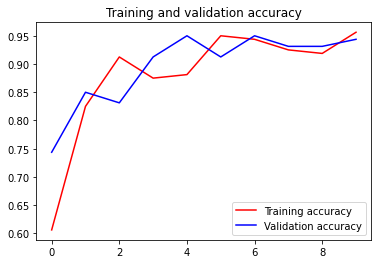

<Figure size 432x288 with 0 Axes>

In [77]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()



In [78]:
loss = history.history['loss']
val_loss = history.history['val_loss']

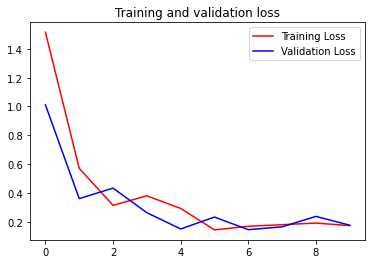

In [79]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [80]:
from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model
from tensorflow.keras.layers import BatchNormalization

In [81]:
input = Input(shape =(224,224,3))

In [82]:
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [83]:
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [84]:
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [85]:
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [86]:
x = Conv2D (filters =1024, kernel_size =3, padding ='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [87]:
x = Conv2D (filters =1024, kernel_size =3, padding ='same', activation='relu')(x)

In [88]:
x = Flatten()(x)
x = Dropout(0.5)(x)
output = Dense(units = 4, activation ='softmax')(x)

In [ ]:
model = Model (inputs=input, outputs =output)
model.summary()

In [90]:
 model.compile(loss='binary_crossentropy', optimizer='Adam',
                          metrics=['categorical_accuracy'])

In [91]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range=0.2,
                                 shear_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/content/training', batch_size=16, class_mode='categorical', target_size=(224,224))

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/content/testing', batch_size=16, class_mode='categorical', target_size=(224,224))


Found 15335 images belonging to 4 classes.
Found 13153 images belonging to 4 classes.


In [92]:
history = model.fit(training_set, validation_data = test_set, epochs = 10, steps_per_epoch=10, validation_steps=10)

Epoch 1/10
10/10 [==============================] - 149s 15s/step - loss: 4.1069 - categorical_accuracy: 0.6375 - val_loss: 1.1955 - val_categorical_accuracy: 0.5312
Epoch 2/10
10/10 [==============================] - 137s 14s/step - loss: 2.2509 - categorical_accuracy: 0.5688 - val_loss: 3.9366 - val_categorical_accuracy: 0.4938
Epoch 3/10
10/10 [==============================] - 136s 14s/step - loss: 2.2379 - categorical_accuracy: 0.6187 - val_loss: 8.1645 - val_categorical_accuracy: 0.4625
Epoch 4/10
10/10 [==============================] - 136s 14s/step - loss: 1.7030 - categorical_accuracy: 0.5938 - val_loss: 10.4809 - val_categorical_accuracy: 0.4375
Epoch 5/10
10/10 [==============================] - 140s 14s/step - loss: 1.0923 - categorical_accuracy: 0.7250 - val_loss: 12.9294 - val_categorical_accuracy: 0.4563
Epoch 6/10
10/10 [==============================] - 136s 14s/step - loss: 0.7777 - categorical_accuracy: 0.7125 - val_loss: 10.3321 - val_categorical_accuracy: 0.4938
E

In [93]:
model.evaluate_generator(training_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[4.9209980964660645, 0.480925977230072]

In [94]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

<Figure size 432x288 with 0 Axes>

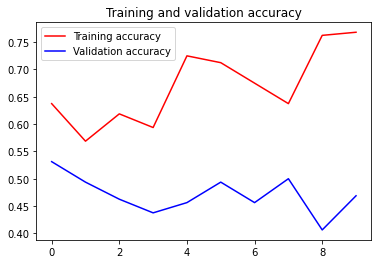

<Figure size 432x288 with 0 Axes>

In [95]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [96]:
loss = history.history['loss']
val_loss = history.history['val_loss']

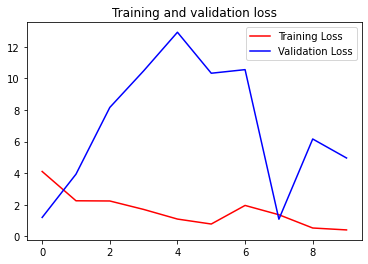

In [97]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()